# Effect of Prosper Loan Features on Loan Amount
## by Ozavize Alabi


## Investigation Overview

Some form of correlation exist between Investors and LoanOrignalAmount, we can also observe that some form of relationship exist between StatedMonthlyIncome and LoanOriginalAmount(0.18) further inverstigation with more records and features is required to be certain.

As for the effect of categorical features it is also observed that more loans were given to borrowers who earn more, are home owners, employed, and chose a listing category of 1 (Debt Consolidation)

The overall goal was to investigate how other Loan features in the data affect the loanOriginalAmount, and the distribution of the number of loans given to borrowers as per other Loan features


## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('LoanData_clean.csv')

## Loan Amount Distribution

The purpose is to investigate the distribution of Loan Amount. The distribution indicates tri-modality with most given loan amounts at 4000, 10000, 15000 US dollars

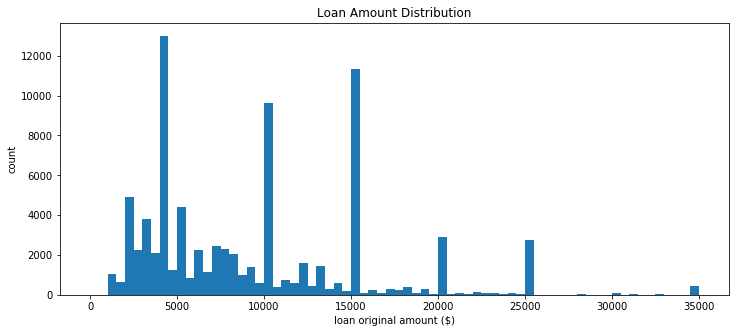

In [4]:
binsize = 500
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('loan original amount ($)')
plt.ylabel('count')
plt.title('Loan Amount Distribution')
plt.show()

## Distribution of Stated Monthly Income

The distribution indicates that majority of the custormers have a monthly income between 2000 and 10000 US dollars with a noticable peak monthly income around 5000 dollars which would likely be the median monthly income

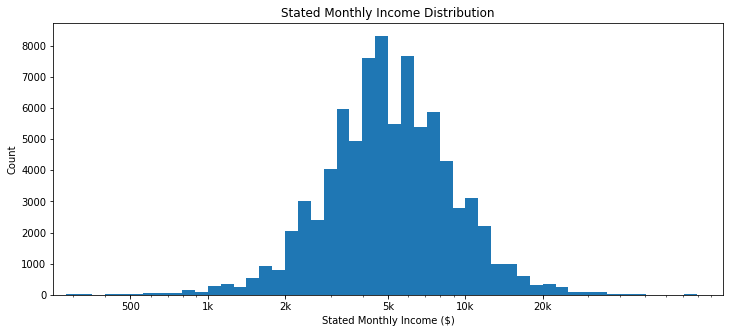

In [7]:
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlim(0, 100000)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Count')
plt.title('Stated Monthly Income Distribution')
plt.show()

## Investors Distribution

Here i tried to investgate how the loans were distributed based the Investors variable. It can be observed that the number of investors that funded most of the loans range from 1 to about 200 in number.

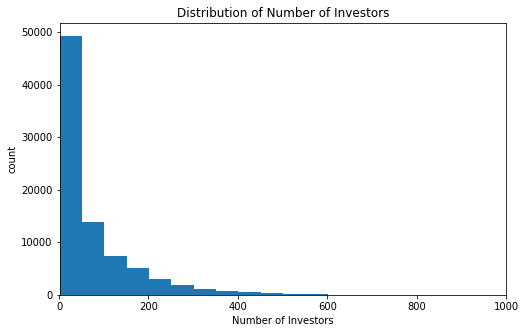

In [9]:
binsize = 50
bins = np.arange(1, df.Investors.max()+binsize, binsize)


plt.figure(figsize=[8, 5])
plt.hist(data=df, x = 'Investors', bins = bins)
plt.xlabel('Number of Investors')
plt.xlim(1, 1000)
plt.ylabel('count')
plt.title('Distribution of Number of Investors');

## Correlation plot of features

From the heat map we can observe that a minute positive relationship exist between Investors and LoanOriginalAmount(0.32), we can also observe that some form of relationship exist between StatedMonthlyIncome and LoanOriginalAmount(0.18) further inverstigation with more records and features is required to be certain.

In [10]:

numerical_vars = ['LoanOriginalAmount','StatedMonthlyIncome','Investors','Recommendations','ListingCategory (numeric)']

categorical_vars = ['ProsperRating (Alpha)','IsBorrowerHomeowner','EmploymentStatus','Occupation', 'ProsperScore']

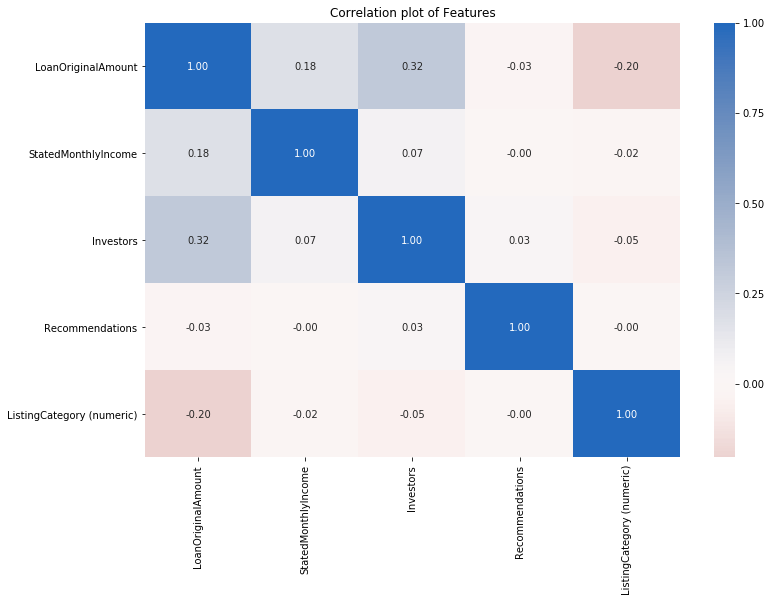

In [14]:
plt.figure(figsize = [12, 8])
sb.heatmap(df[numerical_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Correlation plot of Features')
plt.show()

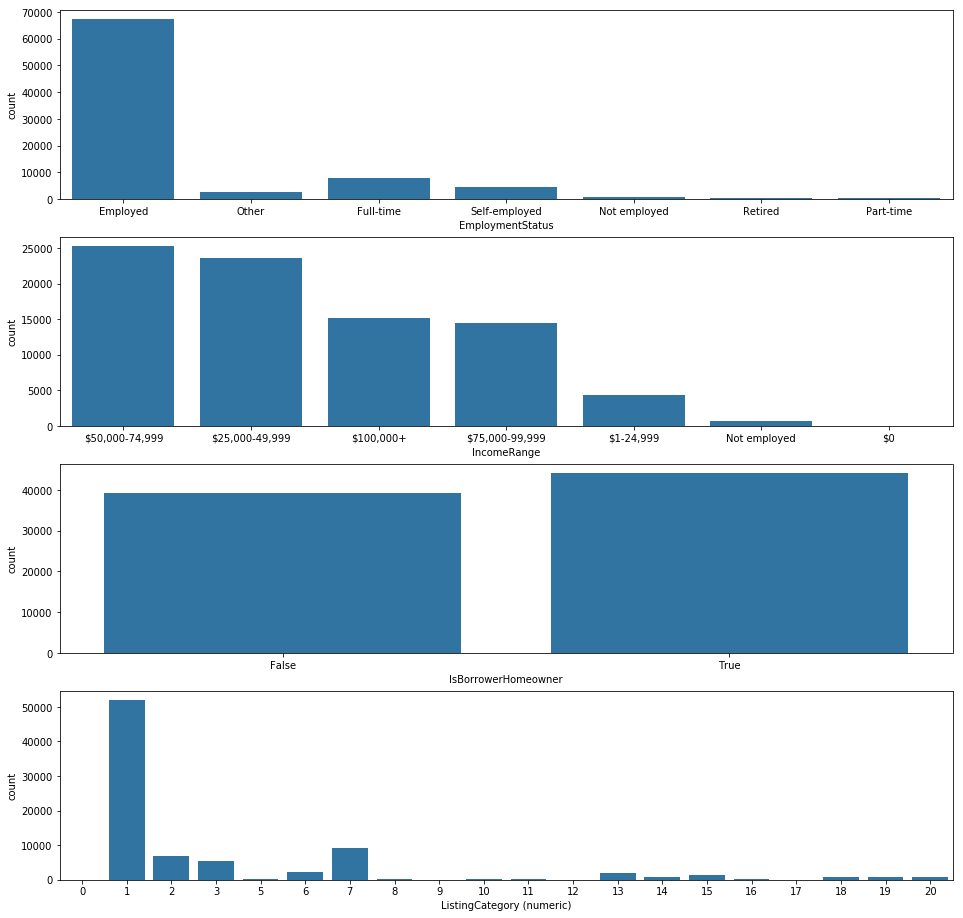

In [18]:
fig, ax = plt.subplots(nrows=4, figsize = [16,16])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'IncomeRange', color = default_color, ax = ax[1])
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[2])
sb.countplot(data = df, x = 'ListingCategory (numeric)', color = default_color, ax = ax[3])

plt.show()

In [22]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 408044 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/s